# Running the Algorithm

The following code reproduces the figure of the manuscript that refers to the US air transportation network, originally considered in 

V. Colizza, R. Pastor-Satorras, and A. Vespignani,
[Reaction–diffusion processes and metapopulation models in heterogeneous networks](https://www.nature.com/articles/nphys560), 
Nature Physics 3, 276–282 (2007)

In [25]:
import networkx as nx
import time
from icm import *
from mes import *

import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from datetime import datetime
random.seed(datetime.now())

In [14]:
## Load graph
#G = nx.karate_club_graph()
G = G=nx.read_edgelist('dataset/karate.edgelist')

In [15]:
T = 1000
p = 0.2

##compute entropy
start_time = time.time()
marg_entropy, cond_entropy = multiple_simulations_ICM (G, p, T)
print("--- %s seconds ---" % (time.time() - start_time))
#print (marg_entropy)

--- 0.7167952060699463 seconds ---


In [16]:
#Maximum Entropy Sampling
mes_rank, mes_value, mes_list_observed = max_ent_sampling (G, marg_entropy, cond_entropy)

--- 0.04794001579284668 seconds ---


In [17]:
#Sampling based on Marginal Entropy
ind_rank, ind_value, ind_list_observed = max_ent_sampling_ind_approx (G, marg_entropy, cond_entropy)

--- 0.008552312850952148 seconds ---


In [18]:
#Random Sampling
ran_rank, ran_value, ran_list_observed = random_sampling (G, marg_entropy, cond_entropy)

--- 0.010220050811767578 seconds ---


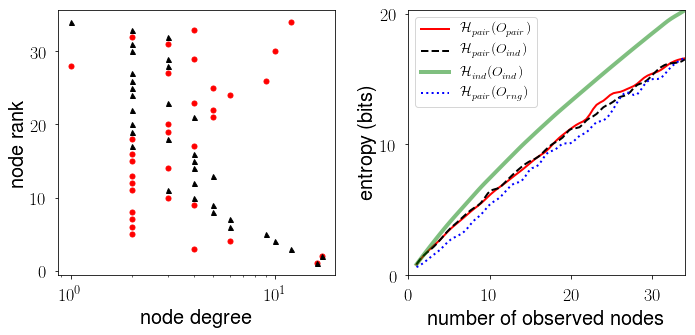

In [26]:
#Visualization

steps = len(G) / 80.0

fig = plt.figure()
fig.set_size_inches(10,5)
plt.rc('text', usetex=True)
plt.rc('font', size=18, **{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8



ax1 = fig.add_subplot(1,2,1)
ax1.set_xlabel('node degree', fontsize=20)
ax1.set_ylabel('node rank', fontsize=20)


ax2 = fig.add_subplot(1,2,2)
ax2.set_xlabel('number of observed nodes', fontsize=20)
ax2.set_ylabel('entropy (bits)', fontsize=20)





x = []
y = []
z = []
for n in G:
    x.append(G.degree(n))
    y.append(mes_rank[n])
    z.append(mes_value[n])
    
    
xnew = np.linspace(min(y), max(y), num=len(y)/steps, endpoint=True)
f = interp1d(y, z, kind='cubic')
ax2.plot(xnew, f(xnew), marker='o', color='red', markeredgecolor='red', linewidth=2.0, markersize=0, alpha=1, label='$\\mathcal{H}_{pair}(O_{pair})$')
ax1.plot(x,y, marker='o', color='red', markeredgecolor='red', linewidth=0.0, markersize=5, alpha=1)
#ax2.plot(y,z, marker='o', color='red', markeredgecolor='red', linewidth=0.0, markersize=5, alpha=1, label='Maximum Entropy Sampling')




x = []
y = []
z = []
tmp = {}
for n in G:
    x.append(G.degree(n))
    y.append(ind_rank[n])
    z.append(ind_value[n])
    tmp[ind_rank[n]] = marg_entropy[n]
    
tmp_y = []
tmp_z = []
norm = 0.0
for n in range(1, len(G)+1, 1):
    tmp_y.append(n)
    norm += tmp[n]
    tmp_z.append(norm)






    
    
xnew = np.linspace(min(y), max(y), num=len(y)/steps, endpoint=True)
f = interp1d(y, z, kind='cubic')
ax2.plot(xnew, f(xnew), marker='^', color='black', markeredgecolor='black', linewidth=2.0, linestyle = 'dashed', markersize=0, alpha=1, label='$\\mathcal{H}_{pair}(O_{ind})$')
ax1.plot(x,y, marker='^', color='black', markeredgecolor='black', linewidth=0.0, markersize=5, alpha=1)
#ax2.plot(y,z, marker='o', color='red', markeredgecolor='red', linewidth=0.0, markersize=5, alpha=1, label='Maximum Entropy Sampling')


xnew = np.linspace(min(tmp_y), max(tmp_y), num=len(tmp_y)/steps, endpoint=True)
f = interp1d(tmp_y, tmp_z, kind='cubic')
ax2.plot(xnew, f(xnew), marker='^', color='green', markeredgecolor='green', linewidth=4.0, linestyle = '-', markersize=0, alpha=0.5, label='$\\mathcal{H}_{ind}(O_{ind})$')





x = []
y = []
z = []
for n in G:
    x.append(G.degree(n))
    y.append(ran_rank[n])
    z.append(ran_value[n])

xnew = np.linspace(min(y), max(y), num=len(y)/steps, endpoint=True)
f = interp1d(y, z, kind='cubic')
ax2.plot(xnew, f(xnew), marker='s', color='blue', markeredgecolor='blue', linewidth=2.0, linestyle = 'dotted', markersize=0, alpha=1, label='$\\mathcal{H}_{pair}(O_{rng})$')
#ax1.plot(x,y, marker='s', color='blue', markeredgecolor='blue', linewidth=0.0, markersize=5, alpha=1)
#ax2.plot(y,z, marker='s', color='red', markeredgecolor='red', linewidth=0.0, markersize=5, alpha=1, label='Random Sampling')




ax2.set_xlim(0, len(G))
ax2.set_ylim(0, max(tmp_z))


ax2.legend(loc=2, numpoints=1, prop={'size':14})
#ax1.locator_params(nbins=4)
ax1.set_xscale('log')
ax2.locator_params(nbins=4)



fig.tight_layout()
plt.show()